# BACTERIA

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [2]:
#import packages
import os
import dokdo
import qiime2 as q2
import seaborn as sns
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [3]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [4]:
# import data
denoisetable_ba = q2.Artifact.load('./results/denoisetable_ba.qza')
rep_seqs_ba = q2.Artifact.load('./results/rep_seqs_ba.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

In [5]:
from qiime2.plugins import feature_table

# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_ba,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 35b8dcbb-cc7f-4fd2-8ee5-418471a4b378>

## TREE

In [6]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_ba,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-lmxbeggl/95d8735b-ebe7-4ad0-b3ca-72fe6136f3c4/data/dna-sequences.fasta



inputfile = orig
416 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  401 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  410 / 416
done.

Progressive alignment 1/2... 
STEP    42 / 415 (thread    0)
Reallocating..done. *alloclen = 1525
STEP   415 / 415 (thread    0) h
done.

Making a distance matrix from msa.. 
  400 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  410 / 416
done.

Progressive alignment 2/2... 
STEP   194 / 415 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   415 / 415 (thread    0) h
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto 

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-ogoz9973/b4662dbe-8da9-4736-938a-f2f217852131/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-ogoz9973/b4662dbe-8da9-4736-938a-f2f217852131/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.14 seconds: Joined    100 of    400
      0.28 seconds: Joined    300 of    400
Initial topology in 0.34 seconds
Refining topology: 35 rounds ME-NNIs, 2 rounds ME-SPRs, 17 rounds ML-NNIs
      0.38 seconds: ME NNI round 2 of 35, 301 of 401 splits, 30 changes (max delta 0.154)
      0.52 seconds: SPR round   1 of   2, 101 of 804 nodes
      0.63 seconds: SPR round   1 of   2, 201 of 804 nodes
      0.73 seconds: SPR round   1 of   2, 301 of 804 nodes
      0.84 seconds: SPR round   1 of   2, 401 of 804 nodes
      0.95 seconds: SPR round   1 of   2, 501 of 804 nodes
      1.0

## ALPHA AND BETA DIVERSITY

In [7]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_ba,
#     max_depth = 40000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [8]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_40000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_40000.qzv')

In [9]:
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/alpha_rarefaction_plot_ba.png')

In [10]:
qzv_file_alpha

<visualization: Visualization uuid: caaa43da-3fef-4226-9c91-3c3c5251f23d>

### ALPHA DIVERSITY

In [11]:
# set sampling_depth based on alpha rarefacation curve
# normalization step
depth = 25899
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_ba,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0005424450793848669 and the largest is 1.4082308386696758.


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-zm48_y5o/d7df4a92-494f-4fb5-b672-546140403023/data/feature-table.biom -t /tmp/qiime2-archive-7f1_7zis/e2da1501-a404-4e9e-8534-0a7dad1d5c98/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-w6nihncu

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-zm48_y5o/d7df4a92-494f-4fb5-b672-546140403023/data/feature-table.biom -t /tmp/qiime2-archive-7f1_7zis/e2da1501-a404-4e9e-8534-0a7dad1d5c98/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-qtwqvonr

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0019819865842780997 and the largest is 0.16045424124059768.


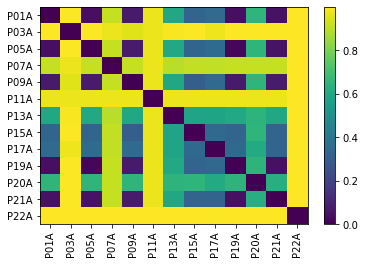

In [12]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

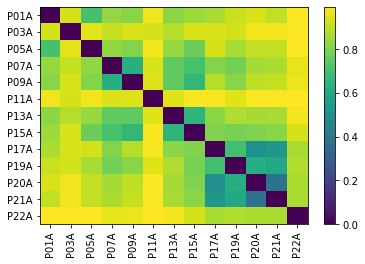

In [13]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [14]:
action_results.jaccard_emperor

<visualization: Visualization uuid: df18101a-dcae-4139-be1f-0b9335422e53>

In [15]:
# alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#    table = denoisetable_ba,
#    phylogeny = rooted_tree,
#    max_depth = depth,
#    metadata = sample_metadata,
#    metrics = {'chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance'},
#    steps =  100
# )

# #   metrics = {'chao1', 'shannon', 'simpson', 'simpson_e', 'observed_features', 'fisher_alpha'}

# # save alpha_rarefacion
# alpha_rarefaction.visualization.save('./results/alpha_rar_new.qzv')

In [16]:
# load alpha_rarefacion
alpha_rar = q2.Visualization.load('./results/alpha_rar_new.qzv')
alpha_rar

<visualization: Visualization uuid: 33052260-2124-4f91-9eb4-ed70e8979cd4>

In [17]:
metrics = ['chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance']
#metrics = ['observed_features', 'fisher_alpha', 'chao1', 'shannon', 'simpson', 'simpson_e']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df= pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

chao1   simpson  simpson_e  observed_features  dominance
Sample ID                                                               
P01A        38.000000  0.073066   0.038529               28.0   0.926934
P03A        82.500000  0.875625   0.098052               82.0   0.124375
P05A        22.000000  0.023220   0.051189               20.0   0.976780
P07A        49.142857  0.707400   0.069748               49.0   0.292600
P09A        24.428571  0.134217   0.048126               24.0   0.865783
P11A        90.000000  0.956907   0.260737               89.0   0.043093
P13A        72.750000  0.797471   0.068577               72.0   0.202529
P15A        42.500000  0.498723   0.051151               39.0   0.501277
P17A       121.500000  0.564734   0.019145              120.0   0.435266
P19A        52.500000  0.032255   0.021986               47.0   0.967745
P20A        88.250000  0.606475   0.030616               83.0   0.393525
P21A        76.000000  0.095735   0.015576               71.0   0.904265
P22A       108.000000  0.878444   0.083097               99.0   0.121556

In [18]:
ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)
ndf.head()

chao1   simpson  simpson_e  observed_features  dominance  \
Sample ID                                                                 
P01A       38.000000  0.073066   0.038529               28.0   0.926934   
P03A       82.500000  0.875625   0.098052               82.0   0.124375   
P05A       22.000000  0.023220   0.051189               20.0   0.976780   
P07A       49.142857  0.707400   0.069748               49.0   0.292600   
P09A       24.428571  0.134217   0.048126               24.0   0.865783   

          sample        location       origin  year parkelj specimen  \
Sample ID                                                              
P01A        P01A  Planinska_jama    Paa200_t0  2015      no   Paa200   
P03A        P03A  Planinska_jama    Paa201_t0  2015      no   Paa201   
P05A        P05A           Stobe  Paa204_t10d  2016      no   Paa204   
P07A        P07A  Planinska_jama    Paa209_t0  2017      no   Paa209   
P09A        P09A  Planinska_jama    Paa210_t0  2019      no   Paa210   

                        population  
Sample ID                           
P01A       Linija reke Ljubljanice  
P03A       Linija reke Ljubljanice  
P05A              Dolenjska linija  
P07A       Linija reke Ljubljanice  
P09A       Linija reke Ljubljanice

In [80]:
col = 'observed_features'
meta_cols = ['year', 'population']
df1 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type="Opažene vrednosti"')

col = 'chao1'
df2 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type="Chao1"')

df = pd.concat([df1, df2])

In [81]:
df = df.rename(columns={'population': 'Genetska linija', 'year': 'Leto', 'value': 'Število ASV', 'type': 'Metrika'})
df.index.name = 'Osebek'

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_obs-feat_chao1.png


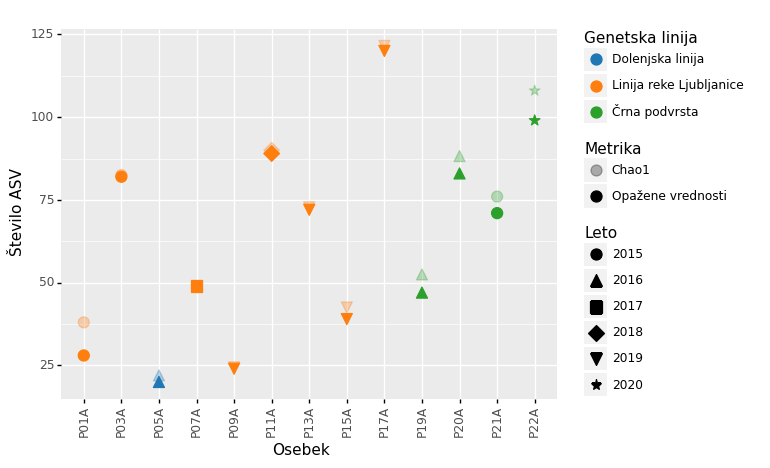

<ggplot: (8764541656351)>

In [92]:
from plotnine import *
from plotnine.data import *

p = (
    ggplot(df, aes(x=df.index, y='Število ASV', shape='Leto', color='Genetska linija', alpha='Metrika'))
    + geom_point(size=4)
    + labs(x='Osebek', y='Število ASV')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + scale_alpha_manual([0.3, 1.0])
    + theme(axis_text_x=element_text(rotation=90))
)

p.save('./results/bacteria_obs-feat_chao1.png')

p

In [21]:
#ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)

# fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# ax=axs[0]
# ax.scatter(ndf.index, ndf.observed_features, color="C"+ndf.groupby("population").ngroup().astype(str))
# ax.set_ylim([0, None])
# ax.tick_params(axis='x', labelrotation=90)

# ax=axs[1]
# ax.scatter(ndf.index, ndf.shannon_entropy)
# ax.set_ylim([0, None])
# ax.tick_params(axis='x', labelrotation=90)


# plt.tight_layout()

In [22]:
ndf

chao1   simpson  simpson_e  observed_features  dominance  \
Sample ID                                                                  
P01A        38.000000  0.073066   0.038529               28.0   0.926934   
P03A        82.500000  0.875625   0.098052               82.0   0.124375   
P05A        22.000000  0.023220   0.051189               20.0   0.976780   
P07A        49.142857  0.707400   0.069748               49.0   0.292600   
P09A        24.428571  0.134217   0.048126               24.0   0.865783   
P11A        90.000000  0.956907   0.260737               89.0   0.043093   
P13A        72.750000  0.797471   0.068577               72.0   0.202529   
P15A        42.500000  0.498723   0.051151               39.0   0.501277   
P17A       121.500000  0.564734   0.019145              120.0   0.435266   
P19A        52.500000  0.032255   0.021986               47.0   0.967745   
P20A        88.250000  0.606475   0.030616               83.0   0.393525   
P21A        76.000000  0.095735   0.015576               71.0   0.904265   
P22A       108.000000  0.878444   0.083097               99.0   0.121556   

          sample        location         origin  year parkelj specimen  \
Sample ID                                                                
P01A        P01A  Planinska_jama      Paa200_t0  2015      no   Paa200   
P03A        P03A  Planinska_jama      Paa201_t0  2015      no   Paa201   
P05A        P05A           Stobe    Paa204_t10d  2016      no   Paa204   
P07A        P07A  Planinska_jama      Paa209_t0  2017      no   Paa209   
P09A        P09A  Planinska_jama      Paa210_t0  2019      no   Paa210   
P11A        P11A  Planinska_jama      Paa211_t0  2018      no   Paa211   
P13A        P13A  Planinska_jama      Paa219_t0  2019      no   Paa219   
P15A        P15A  Planinska_jama      Paa220_t0  2019      no   Paa220   
P17A        P17A  Planinska_jama      Paa221_t0  2019      no   Paa221   
P19A        P19A          Obrsec  PB271_parkelj  2016     yes    PB271   
P20A        P20A          Obrsec  PB272_parkelj  2016     yes    PB272   
P21A        P21A       Jelsevnik  PB644_parkelj  2015     yes    PB644   
P22A        P22A          Obrsec  PAP20_parkelj  2020     yes    PAP20   

                        population  
Sample ID                           
P01A       Linija reke Ljubljanice  
P03A       Linija reke Ljubljanice  
P05A              Dolenjska linija  
P07A       Linija reke Ljubljanice  
P09A       Linija reke Ljubljanice  
P11A       Linija reke Ljubljanice  
P13A       Linija reke Ljubljanice  
P15A       Linija reke Ljubljanice  
P17A       Linija reke Ljubljanice  
P19A                 Črna podvrsta  
P20A                 Črna podvrsta  
P21A                 Črna podvrsta  
P22A                 Črna podvrsta

In [23]:
# shannon = (
#     ggplot(ndf, aes(x=ndf.index, y='shannon_entropy', shape='year', color='population'))
#     + geom_point(size=4)
#     + labs(x='Sample ID', y='shannon_entropy')
#     + scale_color_manual(['C0', 'C1', 'C2'])
# )

# shannon.save('./results/bacteria_shannon.png')
# shannon

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_simpson_e.png


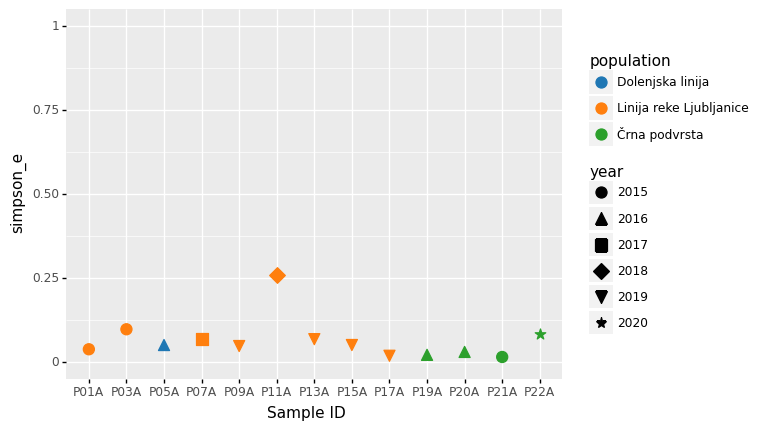

<ggplot: (8764425692176)>

In [24]:
simpson = (
    ggplot(ndf, aes(x=ndf.index, y='simpson_e', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='simpson_e')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

simpson.save('./results/bacteria_simpson_e.png')
simpson 

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_simpson1.png


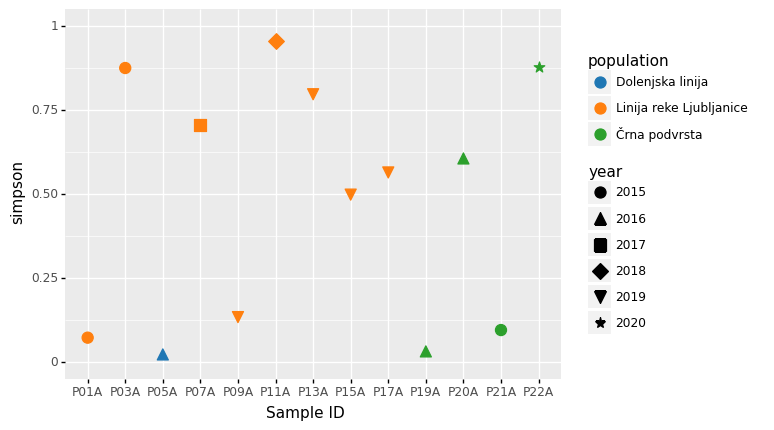

<ggplot: (8764541582924)>

In [25]:
simpson1 = (
    ggplot(ndf, aes(x=ndf.index, y='simpson', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='simpson')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

simpson1.save('./results/bacteria_simpson1.png')
simpson1 

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_dominance.png


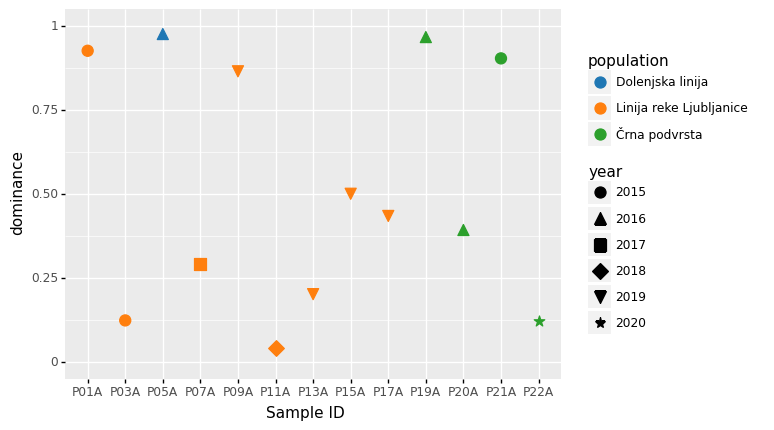

<ggplot: (8764550339967)>

In [26]:
dominance = (
    ggplot(ndf, aes(x=ndf.index, y='dominance', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='dominance')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

dominance.save('./results/bacteria_dominance.png')
dominance

In [27]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [28]:
# # simpson viz
# visualizations['simpson_e']

# # simpson viz
# visualizations['simpson']

# # fisher_alpha viz
# visualizations['fisher_alpha']

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # faith_pd viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.faith_pd_vector,
#     metadata = sample_metadata
# ).visualization

# # observed_features viz
# visualizations['observed_features']

# # chao1 viz
# visualizations['chao1']

# # shannon viz
# visualizations['shannon']

### BETA DIVERSITY

In [29]:
# make a subset, filter out dolenjska linija P05A
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[population] IN ('Linija reke Ljubljanice', 'Črna podvrsta')"
)

In [30]:
# make a subset, filter out P07A (2017), P11A (2018), P22A (2020); leave 2015, 2016, 2019
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2016', '2019')"
)

In [31]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 27291
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0005601217264132763 and the largest is 1.3186020178127456.


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-03iewxpo/8e21a26f-24e7-44b6-b26c-fe11be949530/data/feature-table.biom -t /tmp/qiime2-archive-7f1_7zis/e2da1501-a404-4e9e-8534-0a7dad1d5c98/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-q9kh6e0h

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-03iewxpo/8e21a26f-24e7-44b6-b26c-fe11be949530/data/feature-table.biom -t /tmp/qiime2-archive-7f1_7zis/e2da1501-a404-4e9e-8534-0a7dad1d5c98/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-jp10eeot

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0019416204442829115 and the largest is 0.15295754941645032.


In [32]:
depth = 27291
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.00026667018874845674 and the largest is 0.8345948360788338.


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-j1bztqid/d9f9063e-d945-4bcd-b5ba-79d46ae66aff/data/feature-table.biom -t /tmp/qiime2-archive-7f1_7zis/e2da1501-a404-4e9e-8534-0a7dad1d5c98/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-qc87855d

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-j1bztqid/d9f9063e-d945-4bcd-b5ba-79d46ae66aff/data/feature-table.biom -t /tmp/qiime2-archive-7f1_7zis/e2da1501-a404-4e9e-8534-0a7dad1d5c98/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-82g3goc9

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0005939050405530322 and the largest is 0.10146743754776492.


#### PERMANOVA

In [33]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization
# statistično značilno skupine enake - potrjena nulta hpoteza

<visualization: Visualization uuid: 7699cb47-b5ed-4297-a852-c82f16ba6667>

<Figure size 432x288 with 0 Axes>

In [34]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

# ne moremo trdit da so si med leti enake

<visualization: Visualization uuid: c900e9fc-5d96-40e4-b855-48fc7a1fd7c5>

<Figure size 432x288 with 0 Axes>

#### PERMANOVA ADONIS

Thefunction partitions sums of squares of a multivariate data set, and is
directly analogous to MANOVA (multivariate analysis of variance). This
action differs from beta_group_significance in that it accepts R formulae
to perform multi-way ADONIS tests; beta_group_signficance only performs
one-way tests.

In [35]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "population+year"
)

adonis.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmpa3y7u0b6/dm.tsv /tmp/tmpa3y7u0b6/md.tsv population+year 999 1 /tmp/qiime2-temp-b_jstnzq/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: 03bd7fda-8dca-4f2a-8403-725dd67db532>

In [36]:
adonis2 = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "year+population"
)

adonis2.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmp6sv_yjgs/dm.tsv /tmp/tmp6sv_yjgs/md.tsv year+population 999 1 /tmp/qiime2-temp-axr3fqyr/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: 4c97b780-8cec-434e-9c28-7b147ee3d48e>

In [37]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "population*year"
)

adonis.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmpfab3y0b4/dm.tsv /tmp/tmpfab3y0b4/md.tsv population*year 999 1 /tmp/qiime2-temp-9a86eiis/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: 62b998be-cdea-4f7d-88fb-22bdbaddfc64>

In [38]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "year*population"
)

adonis.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmpq6jwabfa/dm.tsv /tmp/tmpq6jwabfa/md.tsv year*population 999 1 /tmp/qiime2-temp-6hjtkw5w/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: 9d0ea086-c539-4648-8e63-cfb1be487f84>

#### ANOSIM

In [39]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

<visualization: Visualization uuid: 3bda7ca4-e269-4be0-8de8-75d6dd5254e7>

<Figure size 432x288 with 0 Axes>

In [40]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization

<visualization: Visualization uuid: 42a9ab01-1a32-4068-b372-81b9853a1709>

<Figure size 432x288 with 0 Axes>